<a href="https://colab.research.google.com/github/javier-jaime/Stock_Price_Forecasting/blob/main/LSPD_Price_Forecasting_with_yfinance_and_Facebook_Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Stock Price Forecasting with yfinance and Facebook Prophet**

## Importing all the necessary Libraries

In [19]:
!pip install yfinance
import yfinance as yf
import pandas as pd
import numpy as np
import plotly.express as px
from fbprophet import Prophet
import plotly.io as pio
pio.renderers.default='colab'

## Importing the Dataset & Exploring it

In [20]:
# Stock Ticker Input
stock = input('Enter the stock ticker: ')
print(f'You entered {stock}, here is the data from the last 10 days:')
period = '3y'
ticker = yf.Ticker(stock)
data = ticker.history(period)
data.reset_index(inplace=True)
data.tail(10)

Enter the stock ticker: LSPD.TO
You entered LSPD.TO, here is the data from the last 10 days:


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
729,2022-02-02,45.000000,45.009998,40.240002,40.759998,1654900,0,0
730,2022-02-03,34.049999,41.070000,33.480000,39.119999,2307800,0,0
731,2022-02-04,39.849998,40.980000,39.049999,40.169998,1034200,0,0
732,2022-02-07,40.689999,41.900002,39.130001,39.220001,882900,0,0
733,2022-02-08,39.180000,39.459999,37.900002,38.459999,1196700,0,0
734,2022-02-09,39.400002,40.939999,39.230000,40.869999,1009600,0,0
735,2022-02-10,39.639999,42.889999,39.250000,41.060001,1296700,0,0
736,2022-02-11,40.930000,41.389999,37.160000,37.939999,1611100,0,0
737,2022-02-14,38.000000,38.639999,36.540001,36.619999,954900,0,0
738,2022-02-15,38.020000,39.080002,37.860001,38.689999,476885,0,0


In [21]:
print('These are the basic stats:')
data.describe()

These are the basic stats:


,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,739.000000,739.000000,739.000000,739.000000,7.390000e+02,739.0,739.0
mean,56.925873,58.308836,55.388525,56.876367,6.443775e+05,0.0,0.0
std,33.248291,33.899758,32.608161,33.286057,5.422307e+05,0.0,0.0
min,11.860000,13.690000,10.500000,12.000000,2.070000e+04,0.0,0.0
25%,33.619999,34.160000,32.670000,33.570000,3.186500e+05,0.0,0.0
50%,42.020000,42.919998,40.680000,41.900002,5.301000e+05,0.0,0.0
75%,84.334999,86.389999,82.150002,84.260002,8.313000e+05,0.0,0.0
max,160.940002,165.869995,157.130005,158.929993,6.905100e+06,0.0,0.0


# Data Visualization (plotly express) - Visualizing the historical performance

In [22]:
#Line graph (Price), Area graph (Volume) , box plot (Analyzing price and volume)

In [23]:
px.line(data, x="Date", y="Close", title=f'{stock} Stock Close Price')

In [24]:
px.bar(data, x="Date", y="Volume", title=f'{stock} Stock Volume')

In [25]:
px.box(data, y="Close", title=f'{stock} box plot', height=500, width=500)

In [26]:
def get_hurst_exponent(time_series, max_lag=20):
    """Returns the Hurst Exponent of the time series"""
    lags = range(2, max_lag)
    # variances of the lagged differences
    tau = [np.std(np.subtract(time_series[lag:], time_series[:-lag])) for lag in lags]
    # calculate the slope of the log plot -> the Hurst Exponent
    reg = np.polyfit(np.log(lags), np.log(tau), 1)
    return reg[0]

In [27]:
hurst = pd.DataFrame(columns =["hurst_exp","lag"])
lags = range(4, 121, 2)
for lag in lags:
    hurst_exp = get_hurst_exponent(data["Close"].values, lag)
    hurst = hurst.append({"hurst_exp":hurst_exp,"lag":lag},ignore_index=True)
px.line(hurst, x="hurst_exp", y="lag", title=f'{stock} Hurst Exp')

## Data Preparation for Facebook Prophet

In [28]:
columns=['Date','Close']
prophet_df=pd.DataFrame(data,columns=columns)
prophet_df= prophet_df.rename(columns={'Date':'ds','Close':'y'})  
prophet_df.tail()

,ds,y
734,2022-02-09,40.869999
735,2022-02-10,41.060001
736,2022-02-11,37.939999
737,2022-02-14,36.619999
738,2022-02-15,38.689999


## Creating Facebook Prophet Model

In [29]:
m=Prophet(yearly_seasonality=True)
m.fit(prophet_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


##Forecasting

In [30]:
periods = 30
future=m.make_future_dataframe(periods)

In [31]:
forecast=m.predict(future)

In [32]:
forecast.head(10)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-03-08,38.119398,20.395923,49.005898,38.119398,38.119398,-4.423486,-4.423486,-4.423486,3.717524,3.717524,3.717524,-8.141010,-8.141010,-8.141010,0.0,0.0,0.0,33.695912
1,2019-03-11,37.928678,16.761369,43.757110,37.928678,37.928678,-7.124528,-7.124528,-7.124528,3.883187,3.883187,3.883187,-11.007715,-11.007715,-11.007715,0.0,0.0,0.0,30.804150
2,2019-03-12,37.865105,16.089000,44.384610,37.865105,37.865105,-7.872016,-7.872016,-7.872016,4.018381,4.018381,4.018381,-11.890396,-11.890396,-11.890396,0.0,0.0,0.0,29.993089
3,2019-03-13,37.801531,15.215478,43.347742,37.801531,37.801531,-8.885946,-8.885946,-8.885946,3.842205,3.842205,3.842205,-12.728151,-12.728151,-12.728151,0.0,0.0,0.0,28.915585
4,2019-03-14,37.737958,14.472940,42.460610,37.737958,37.737958,-9.396089,-9.396089,-9.396089,4.120577,4.120577,4.120577,-13.516666,-13.516666,-13.516666,0.0,0.0,0.0,28.341869
5,2019-03-15,37.674384,13.141390,40.832223,37.674384,37.674384,-10.534639,-10.534639,-10.534639,3.717524,3.717524,3.717524,-14.252163,-14.252163,-14.252163,0.0,0.0,0.0,27.139745
6,2019-03-18,37.483664,11.869638,39.659307,37.483664,37.483664,-12.227617,-12.227617,-12.227617,3.883187,3.883187,3.883187,-16.110804,-16.110804,-16.110804,0.0,0.0,0.0,25.256047
7,2019-03-19,37.420091,10.268937,38.796743,37.420091,37.420091,-12.588767,-12.588767,-12.588767,4.018381,4.018381,4.018381,-16.607147,-16.607147,-16.607147,0.0,0.0,0.0,24.831324
8,2019-03-20,37.356517,10.210420,37.212502,37.356517,37.356517,-13.197370,-13.197370,-13.197370,3.842205,3.842205,3.842205,-17.039575,-17.039575,-17.039575,0.0,0.0,0.0,24.159147
9,2019-03-21,37.292944,9.634116,37.898525,37.292944,37.292944,-13.286896,-13.286896,-13.286896,4.120577,4.120577,4.120577,-17.407473,-17.407473,-17.407473,0.0,0.0,0.0,24.006047


In [33]:
px.line(forecast, x='ds',y='yhat', title=f'{stock} Stock Forecast')

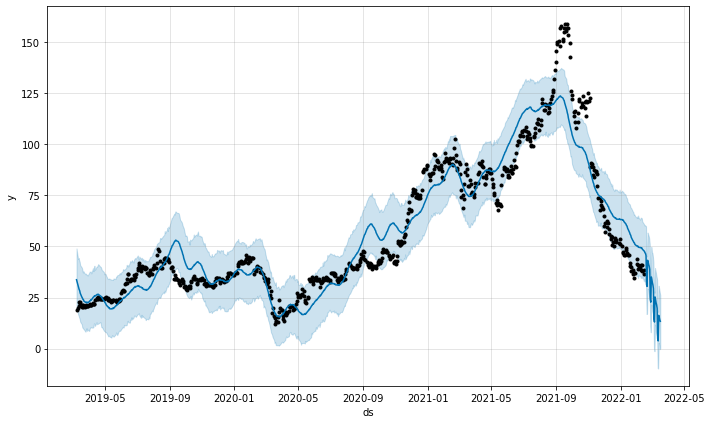

In [34]:
figure=m.plot(forecast, xlabel='ds', ylabel='y')

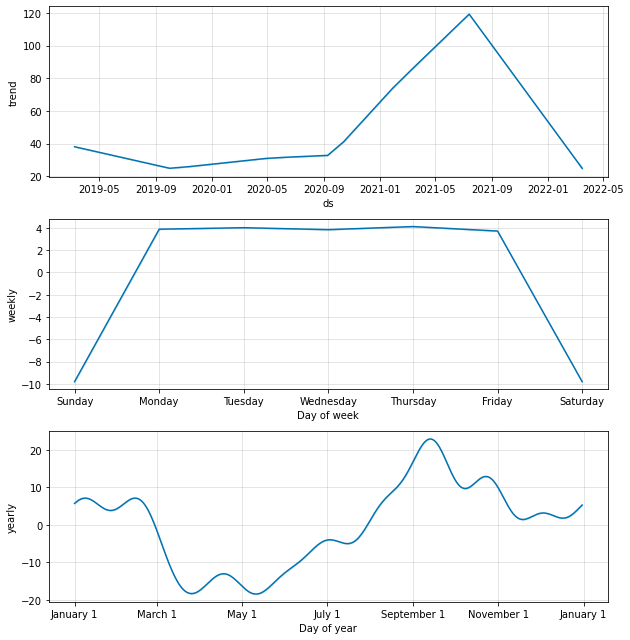

In [35]:
figure2=m.plot_components(forecast)

##Downloading the Forecast data

In [18]:
from google.colab import files
forecast.to_csv(f'{stock}_forecast.csv')
files.download(f'{stock}_forecast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>